# Disaster Tweet Classification

Tweets from the Twitter API will be used during testing. The neural network will be trained using disaster tweets dataset from kaggle for target values(real disaster or not).

## Twitter API

importing relevant modules

In [6]:
!pip install tweepy
!pip install tqdm

In [7]:
import numpy as np 
import pandas as pd 
import tweepy as tw 
from tqdm import tqdm

Twitter API data

In [8]:
consumer_api_key = '7UOsEwHSjHgyjOa9wKcSkLQ2O'
consumer_api_secret = 'nvqgMX3JNIyJuAXUgmXUAEWSE4KOrbPhrQgFvio7y3IAu1wNby'

authenticate twitter API account

In [9]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Setting search words for the API to retrieve from twitter

In [93]:
tweets_copy = [] #creating a copy of the tweets
hashtags = ['#debris', '#reckage', '#oil spill', '#typhoon', '#evacuated', '#suicide bombing', '#rescuers',
            '#suicide bombers', '#nuclear', '#earthquake', '#floods', '#tsunami'] #Type you keyword here 
for i in hashtags:
    search_words = i + " -filter:retweets"
    tweets = tw.Cursor(api.search_tweets,
                    q=search_words,
                    lang="en",     
                    ).items(2000) #enter the number of tweets you want to collect
    for tweet in tqdm(tweets):
        tweets_copy.append(tweet)

48it [00:02, 22.96it/s]
0it [00:00, ?it/s]
35it [00:01, 21.97it/s]
69it [00:02, 27.30it/s]
11it [00:00, 14.73it/s]
4it [00:00,  5.57it/s]
15it [00:00, 18.05it/s]
2it [00:00,  2.71it/s]
2000it [01:00, 33.04it/s]
2000it [00:57, 35.08it/s]
507it [00:15, 33.24it/s]
191it [00:06, 30.00it/s]


In [94]:
print(f"New tweets retrieved: {len(tweets_copy)}")

New tweets retrieved: 4882


In [95]:
tweets_df = pd.DataFrame() #creating a dataframe
for tweet in tqdm(tweets_copy): #looping through the tweets
    hashtags = [] #creating a list of hashtags
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'id': [tweet.id],
                                               'user_location': tweet.user.location,\
                                               'date': tweet.created_at,
                                               'text': tweet.text, 
                                               'hashtags': [hashtags if hashtags else None]},index=[0]))

  0%|          | 0/4882 [00:00<?, ?it/s]C:\Users\chand\AppData\Local\Temp\ipykernel_8900\2235323323.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'id': [tweet.id],
C:\Users\chand\AppData\Local\Temp\ipykernel_8900\2235323323.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'id': [tweet.id],
C:\Users\chand\AppData\Local\Temp\ipykernel_8900\2235323323.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_df = tweets_df.append(pd.DataFrame({'id': [tweet.id],
C:\Users\chand\AppData\Local\Temp\ipykernel_8900\2235323323.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [96]:
tweets_df 

,id,user_location,date,text,hashtags
0,1601436443154722816,Kathmandu,2022-12-10 04:39:35+00:00,#Melamchi resumed water supply to #Kathmandu o...,"[Melamchi, Kathmandu, debris]"
0,1601409062167793664,,2022-12-10 02:50:47+00:00,#Russia-Ukraine War: #Firefighters at work ami...,"[Russia, Firefighters, debris, destroyed, Russ..."
0,1601396279535316993,"New Delhi, India",2022-12-10 02:00:00+00:00,Large #constellations come with many benefits ...,"[constellations, debris]"
0,1601341400980889602,"Dordogne, Aquitaine",2022-12-09 22:21:56+00:00,I've just watched episode S01 | E08 of Debris!...,"[debris, tvtime]"
0,1601334215475597312,,2022-12-09 21:53:22+00:00,"Remnants of buildings now #underwater, still w...","[underwater, gamedev, indiegames, lowpoly]"
...,...,...,...,...,...
0,1598329605231869952,"San Diego, CA",2022-12-01 14:54:08+00:00,"⚠️ #Florida #earthquake #tsunami ""When I learn...","[Florida, earthquake, tsunami]"
0,1598325862482563072,"Brooklyn, NY",2022-12-01 14:39:15+00:00,We don't need a #Tsunami to inundate the #DSA/...,"[Tsunami, DSA, WFP, NoDsaNy]"
0,1598307033580998656,,2022-12-01 13:24:26+00:00,This is how grueling it can get when Death Wav...,None
0,1598293334471999488,"Esposende, Portugal",2022-12-01 12:30:00+00:00,1 December 1927 4:37 UT\nMw6.2 #earthquake at ...,[earthquake]


keywords in disaster tweets

In [97]:
keywords_data = ['ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging',
       'body bags', 'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned',
       'burning', 'burning buildings', 'bush fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical emergency',
       'cliff fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed', 'derailment', 'desolate', 'desolation',
       'destroy', 'destroyed', 'destruction', 'detonate', 'detonation',
       'devastated', 'devastation', 'disaster', 'displaced', 'drought',
       'drown', 'drowned', 'drowning', 'dust storm', 'earthquake',
       'electrocute', 'electrocuted', 'emergency', 'emergency plan',
       'emergency services', 'engulfed', 'epicentre', 'evacuate',
       'evacuated', 'evacuation', 'explode', 'exploded', 'explosion',
       'eyewitness', 'famine', 'fatal', 'fatalities', 'fatality', 'fear',
       'fire', 'fire truck', 'first responders', 'flames',
       'flattened', 'flood', 'flooding', 'floods', 'forest fire',
       'forest fires', 'hail', 'hailstorm', 'harm', 'hazard',
       'hazardous', 'heat wave', 'hellfire', 'hijack', 'hijacker',
       'hijacking', 'hostage', 'hostages', 'hurricane', 'injured',
       'injuries', 'injury', 'inundated', 'inundation', 'landslide',
       'lava', 'lightning', 'loud bang', 'mass%20murder',
       'mass murderer', 'massacre', 'mayhem', 'meltdown', 'military',
       'mudslide', 'natural disaster', 'nuclear disaster',
       'nuclear reactor', 'obliterate', 'obliterated', 'obliteration',
       'oil spill', 'outbreak', 'pandemonium', 'panic', 'panicking',
       'police', 'quarantine', 'quarantined', 'radiation emergency',
       'rainstorm', 'razed', 'refugees', 'rescue', 'rescued', 'rescuers',
       'riot', 'rioting', 'rubble', 'ruin', 'sandstorm', 'screamed',
       'screaming', 'screams', 'seismic', 'sinkhole', 'sinking', 'siren',
       'sirens', 'smoke', 'snowstorm', 'storm', 'stretcher',
       'structural failure', 'suicide bomb', 'suicide bomber',
       'suicide bombing', 'sunk', 'survive', 'survived', 'survivors',
       'terrorism', 'terrorist', 'threat', 'thunder', 'thunderstorm',
       'tornado', 'tragedy', 'trapped', 'trauma', 'traumatised',
       'trouble', 'tsunami', 'twister', 'typhoon', 'upheaval',
       'violent storm', 'volcano', 'war zone', 'weapon', 'weapons',
       'whirlwind', 'wild fires', 'wildfire', 'windstorm', 'wounded',
       'wounds', 'wreck', 'wreckage', 'wrecked']

counting the number of tweets containing the keywords

In [98]:
import copy
tweet_data = copy.deepcopy(tweets_df)

In [99]:
tweet_data

,id,user_location,date,text,hashtags
0,1601436443154722816,Kathmandu,2022-12-10 04:39:35+00:00,#Melamchi resumed water supply to #Kathmandu o...,"[Melamchi, Kathmandu, debris]"
0,1601409062167793664,,2022-12-10 02:50:47+00:00,#Russia-Ukraine War: #Firefighters at work ami...,"[Russia, Firefighters, debris, destroyed, Russ..."
0,1601396279535316993,"New Delhi, India",2022-12-10 02:00:00+00:00,Large #constellations come with many benefits ...,"[constellations, debris]"
0,1601341400980889602,"Dordogne, Aquitaine",2022-12-09 22:21:56+00:00,I've just watched episode S01 | E08 of Debris!...,"[debris, tvtime]"
0,1601334215475597312,,2022-12-09 21:53:22+00:00,"Remnants of buildings now #underwater, still w...","[underwater, gamedev, indiegames, lowpoly]"
...,...,...,...,...,...
0,1598329605231869952,"San Diego, CA",2022-12-01 14:54:08+00:00,"⚠️ #Florida #earthquake #tsunami ""When I learn...","[Florida, earthquake, tsunami]"
0,1598325862482563072,"Brooklyn, NY",2022-12-01 14:39:15+00:00,We don't need a #Tsunami to inundate the #DSA/...,"[Tsunami, DSA, WFP, NoDsaNy]"
0,1598307033580998656,,2022-12-01 13:24:26+00:00,This is how grueling it can get when Death Wav...,None
0,1598293334471999488,"Esposende, Portugal",2022-12-01 12:30:00+00:00,1 December 1927 4:37 UT\nMw6.2 #earthquake at ...,[earthquake]


In [100]:
count = 0
for i in tweet_data['text']:
    for j in keywords_data:
        if j in i:
            count += 1
print(count)
    

2665


Refining dataset and adding a new column (text preprocessing)

In [101]:
for tweet in tweet_data['text']:
    print(tweet)

#Melamchi resumed water supply to #Kathmandu on Friday after repairs incurred by the massive #debris flow on the Me… https://t.co/v10sbioYvC
#Russia-Ukraine War: #Firefighters at work amid the #debris of a residential building #destroyed in #Russian shelli… https://t.co/KwkL4It54K
Large #constellations come with many benefits but also many challenges. What are the priorities for orbital #debris… https://t.co/NB9r5pDVSY
I've just watched episode S01 | E08 of Debris! #debris  https://t.co/jZ3EfAedVx #tvtime https://t.co/pBfMRJCKhU
Remnants of buildings now #underwater, still wip. Minimap intergrated soon. 🐟🫧
#gamedev #indiegames #lowpoly… https://t.co/TAUXz5v7Or
I've just watched episode S01 | E07 of Debris! #debris  https://t.co/pqGeouDdFs #tvtime https://t.co/mZL7tarZOO
GEV Senior Projects day was a success! Our @clasvillanova students presented on diverse research projects including… https://t.co/8gFRMZHyiX
U.S. Monitors for #Chinese Threats of #Space #Debris https://t.co/TMPwhFqtcT #

keywords_row = []
for i in tweets_df['text']:
  keywords_list=[]
  for j in keywords_data:
    if j in i:
      keywords_list.append(j)
  if len(keywords_list) == 0:
    list_str=NaN
  else:
    list_str = ",".join(keywords_list)
  keywords_row.append(list_str)

In [102]:
keywords_row = []
for i in tweets_df['text']:
  keywords_list=[]
  for j in keywords_data:
    if j in i:
      keywords_list.append(j)
  if len(keywords_list) == 0:
    list_str=None
  else:
    list_str = ",".join(keywords_list)
  keywords_row.append(list_str)

In [103]:
keywords_row

['debris',
 'debris,destroy,destroyed',
 'debris',
 'debris',
 None,
 'debris',
 None,
 None,
 'debris',
 'wreck',
 'debris,rubble',
 'debris',
 'debris',
 None,
 'debris',
 None,
 'debris',
 None,
 'debris',
 'debris',
 'debris,wreck',
 'debris',
 'debris',
 'debris',
 None,
 None,
 None,
 'debris',
 None,
 'threat',
 'debris',
 'debris',
 None,
 None,
 None,
 'debris',
 'debris',
 None,
 'flood',
 'debris',
 None,
 'collapse,debris',
 None,
 'debris',
 'debris',
 None,
 None,
 None,
 'oil spill',
 None,
 None,
 'oil spill',
 None,
 'oil spill',
 None,
 None,
 'oil spill',
 None,
 None,
 None,
 'oil spill',
 'oil spill',
 None,
 'oil spill',
 'oil spill',
 'oil spill',
 'oil spill',
 'oil spill',
 None,
 'oil spill',
 None,
 None,
 None,
 None,
 'oil spill',
 'oil spill',
 None,
 'oil spill',
 'oil spill',
 None,
 None,
 None,
 None,
 'storm,typhoon',
 'typhoon',
 'typhoon',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'typhoon',
 None,
 'typhoon',
 None,
 None,
 None,
 No

In [104]:
#tweet_data.drop('keywords', axis=1)


In [105]:
tweet_data.insert(loc=1, column='keywords', value=keywords_row)

In [106]:
tweet_data = tweet_data.drop('hashtags', axis = 1)
tweet_data.head(50)

,id,keywords,user_location,date,text
0,1601436443154722816,debris,Kathmandu,2022-12-10 04:39:35+00:00,#Melamchi resumed water supply to #Kathmandu o...
0,1601409062167793664,"debris,destroy,destroyed",,2022-12-10 02:50:47+00:00,#Russia-Ukraine War: #Firefighters at work ami...
0,1601396279535316993,debris,"New Delhi, India",2022-12-10 02:00:00+00:00,Large #constellations come with many benefits ...
0,1601341400980889602,debris,"Dordogne, Aquitaine",2022-12-09 22:21:56+00:00,I've just watched episode S01 | E08 of Debris!...
0,1601334215475597312,None,,2022-12-09 21:53:22+00:00,"Remnants of buildings now #underwater, still w..."
0,1601275568716189697,debris,"Dordogne, Aquitaine",2022-12-09 18:00:20+00:00,I've just watched episode S01 | E07 of Debris!...
0,1601246588193902592,None,"Villanova, USA",2022-12-09 16:05:11+00:00,GEV Senior Projects day was a success! Our @cl...
0,1601221804668116993,None,,2022-12-09 14:26:42+00:00,U.S. Monitors for #Chinese Threats of #Space #...
0,1601217214262087680,debris,Ohio,2022-12-09 14:08:27+00:00,"Mateo, Emilio; Hydrological shifts and the rol..."
0,1600979023404101632,wreck,,2022-12-08 22:21:58+00:00,Shipwrecks might become more frequent in the f...


In [24]:
tweet_data.to_csv('tweet_testing3.csv')

## Exploratory Data Analysis of tweet_data

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
tweet_data.shape

(4882, 5)

In [109]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4882 entries, 0 to 0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             4882 non-null   int64              
 1   keywords       2059 non-null   object             
 2   user_location  4882 non-null   object             
 3   date           4882 non-null   datetime64[ns, UTC]
 4   text           4882 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 228.8+ KB


In [110]:
tweet_data['keywords'].value_counts()

earthquake                             1224
flood,floods                            125
weapon,weapons                           69
flood                                    43
threat                                   41
                                       ... 
attack,death,deaths                       1
destroy,fear                              1
attack,terrorism                          1
attack,military                           1
apocalypse,earthquake,flood,tsunami       1
Name: keywords, Length: 195, dtype: int64

In [111]:
tweet_data['keywords'].unique()

array(['debris', 'debris,destroy,destroyed', None, 'wreck',
       'debris,rubble', 'debris,wreck', 'threat', 'flood',
       'collapse,debris', 'oil spill', 'storm,typhoon', 'typhoon',
       'cyclone,hurricane,typhoon', 'disaster,typhoon', 'cyclone',
       'military,typhoon', 'evacuate,evacuated,police',
       'evacuate,evacuated', 'evacuate,evacuated,fire',
       'bomb,evacuate,evacuated', 'volcano',
       'evacuate,evacuated,injuries', 'bomb,bombing',
       'bomb,police,terrorism',
       'bomb,bombing,police,suicide bomb,suicide bombing',
       'rescue,rescuers', 'destroy,destroyed',
       'evacuation,rescue,rescuers', 'emergency', 'eyewitness',
       'flood,flooding,trapped', 'danger', 'weapon,weapons', 'weapon',
       'armageddon,destruction', 'disaster', 'harm', 'nuclear reactor',
       'military', 'attack', 'blood,bloody', 'military,terrorism',
       'damage', 'terrorism',
       'disaster,earthquake,emergency,storm,terrorism', 'riot', 'destroy',
       'bomb', 'arm

In [112]:
tweet_data['keywords'].isnull().sum()

2823

Heatmap of null value in the dataset

<AxesSubplot:>

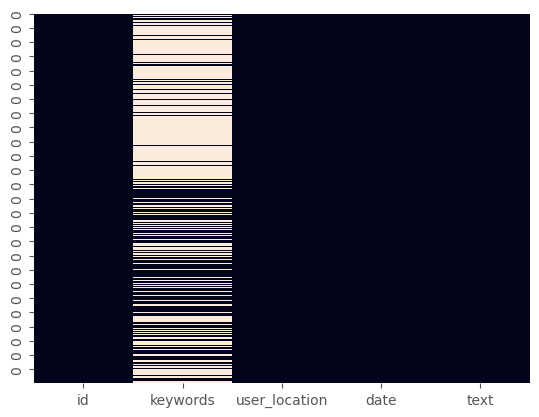

In [113]:
sns.heatmap(tweet_data.isnull(), cbar=False)

In [114]:
word_count = []
for tweet in tweet_data['text']:
    word_count.append(len(tweet.split(" ")))


C:\Users\chand\AppData\Local\Temp\ipykernel_8900\2006171149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count)


<AxesSubplot:ylabel='Density'>

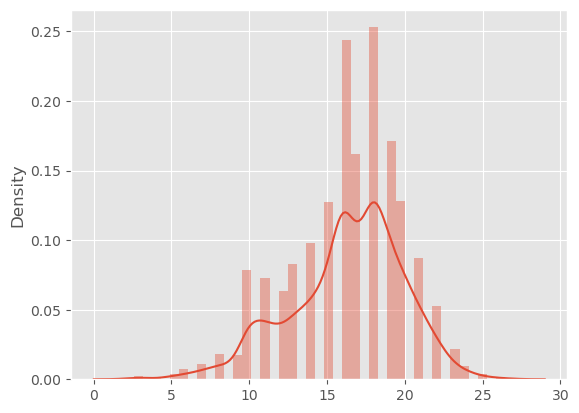

In [115]:
sns.distplot(word_count)

average number of words in a tweet

In [116]:
print((sum(word_count)/len(word_count)))

16.31667349446948


## Exploratory Data Analysis of training dataset

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
train_df = pd.read_csv('C:/Users/chand/Downloads/Dataset for SMA/train.csv')

In [36]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [37]:
train_df.shape

(7613, 5)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<AxesSubplot:xlabel='target', ylabel='Count'>

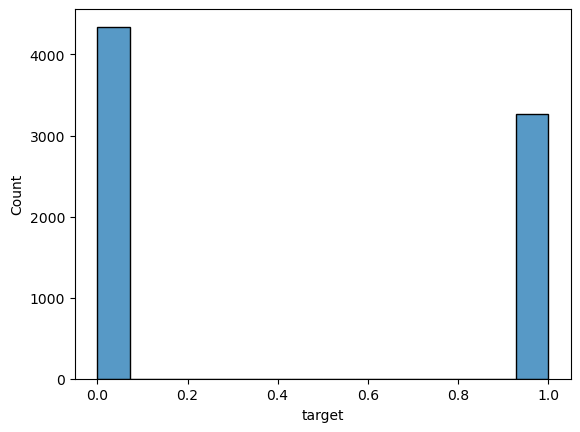

In [39]:
sns.histplot(train_df['target'])


<AxesSubplot:>

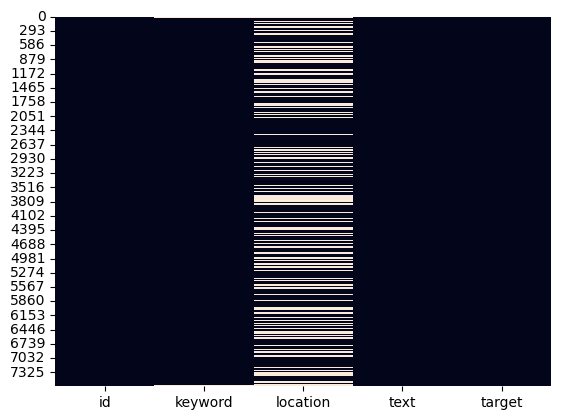

In [40]:
sns.heatmap(train_df.isnull(), cbar=False)

C:\Users\chand\AppData\Local\Temp\ipykernel_8900\3754944206.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count_train)


<AxesSubplot:ylabel='Density'>

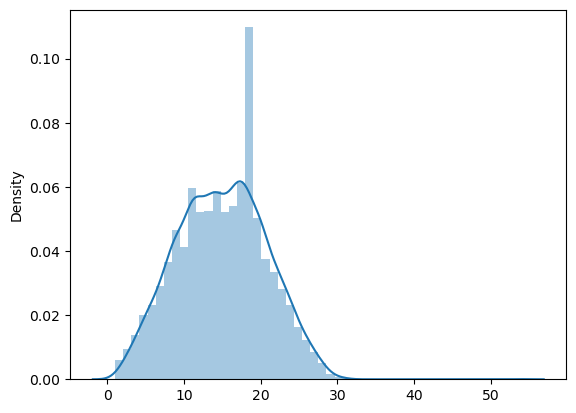

In [41]:
word_count_train = []
for tweet in train_df['text']:
    word_count_train.append(len(tweet.split(" ")))
sns.distplot(word_count_train)

C:\Users\chand\AppData\Local\Temp\ipykernel_8900\3692414371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
C:\Users\chand\AppData\Local\Temp\ipykernel_8900\3692414371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np

Text(0.5, 0.98, 'Average word length in each tweet')

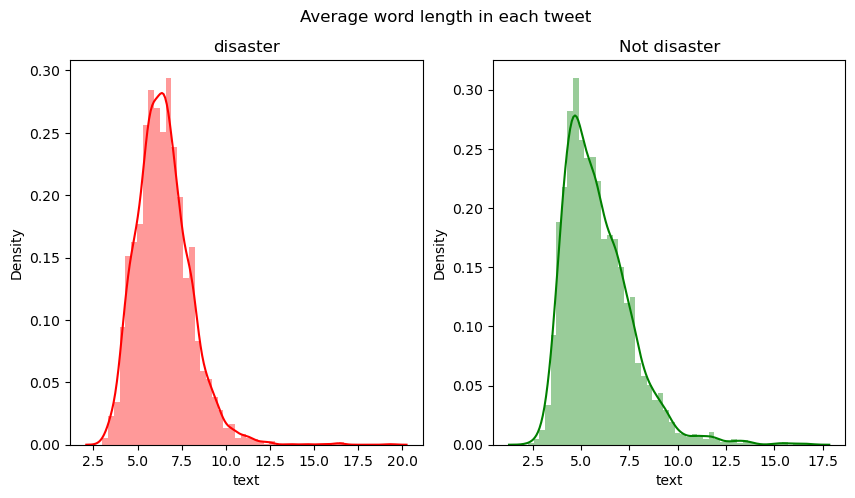

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

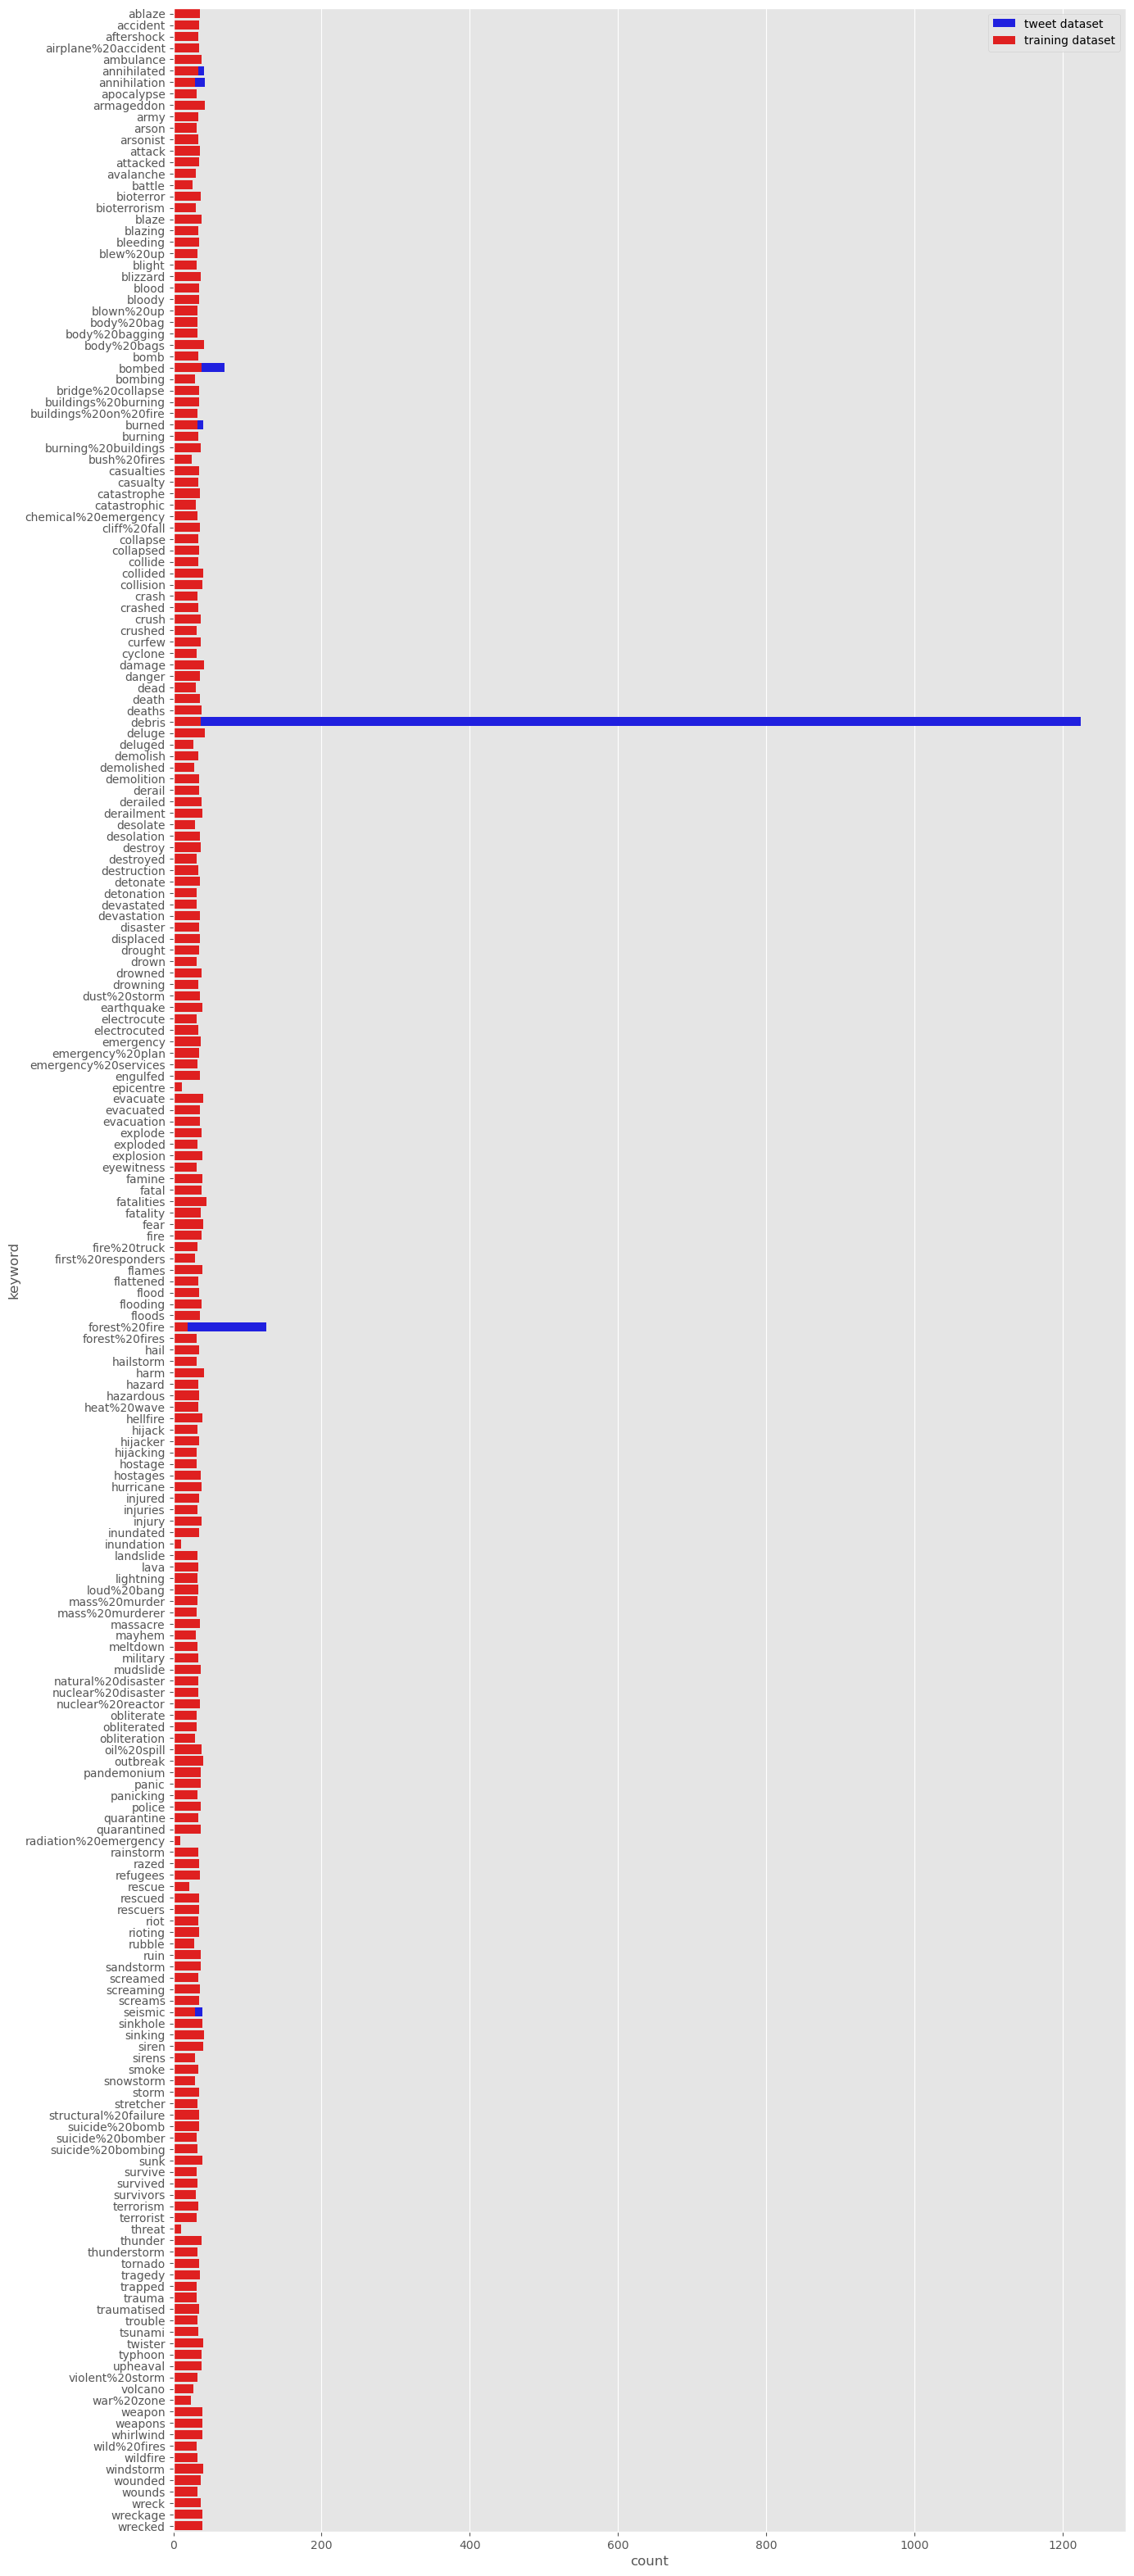

In [119]:
plt.figure(figsize=(15,40))
sns.countplot(y=tweet_data['keywords'], color=(0,0,1), label='tweet dataset' )
sns.countplot(y=train_df['keyword'], color=(1,0,0), label='training dataset')
plt.legend()

In [120]:
train_df['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

## Data Cleaning and Preprocessing

Common steps for data cleaning on the NLP task dealing with tweets are removing special characters, removing stop words, removing URLs, removing numbers, and doing word stemming.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
!pip install gensim
import gensim
import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

### combining both our train and tweets dataset for cleaning

In [44]:
df=pd.concat([train_df,tweet_data])
df.shape

(9186, 8)

Removing URLs

In [45]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [46]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

### Removing HTML tags

In [47]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [48]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [49]:
df['text']=df['text'].apply(lambda x : remove_html(x))

### Removing emojis

In [50]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [51]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

### Removing puncutations

In [52]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="#EARTHQUAKE IN #newdelhi"
print(remove_punct(example))

EARTHQUAKE IN newdelhi


In [53]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

### Spelling Cheker

In [54]:
!pip install pyspellchecker

In [55]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "eartquake in neu delhi"
correct_spellings(text)

'earthquake in new delhi'

### Vectorization using GloVe

Here we will use GloVe pretrained corpus model to represent our words. Here we will try 100 D version

In [56]:
!pip install wget

In [57]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [59]:
corpus=create_corpus(df)

100%|██████████| 9186/9186 [00:00<00:00, 11297.16it/s]


In [60]:
embedding_dict={}
with open('C:/Users/chand/Downloads/glove.6B/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [61]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [62]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 18393


In [63]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 18393/18393 [00:00<00:00, 516129.21it/s]


## LSTM model

In [64]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1839400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,881,705
Trainable params: 42,305
Non-trainable params: 1,839,400
_________________________________________________________________


In [121]:
train=tweet_pad[:train_df.shape[0]]
test=tweet_pad[tweet_data.shape[0]:]

In [67]:
X_train,X_test,y_train,y_test=train_test_split(train,train_df['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [68]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1618/1618 - 42s - loss: 0.6911 - accuracy: 0.5696 - val_loss: 0.6875 - val_accuracy: 0.5727 - 42s/epoch - 26ms/step
Epoch 2/15
1618/1618 - 37s - loss: 0.6090 - accuracy: 0.6830 - val_loss: 0.5418 - val_accuracy: 0.7583 - 37s/epoch - 23ms/step
Epoch 3/15
1618/1618 - 55s - loss: 0.5490 - accuracy: 0.7373 - val_loss: 0.5246 - val_accuracy: 0.7601 - 55s/epoch - 34ms/step
Epoch 4/15
1618/1618 - 53s - loss: 0.5271 - accuracy: 0.7558 - val_loss: 0.5132 - val_accuracy: 0.7592 - 53s/epoch - 33ms/step
Epoch 5/15
1618/1618 - 47s - loss: 0.5177 - accuracy: 0.7673 - val_loss: 0.5030 - val_accuracy: 0.7723 - 47s/epoch - 29ms/step
Epoch 6/15
1618/1618 - 37s - loss: 0.5051 - accuracy: 0.7733 - val_loss: 0.4964 - val_accuracy: 0.7785 - 37s/epoch - 23ms/step
Epoch 7/15
1618/1618 - 38s - loss: 0.4998 - accuracy: 0.7727 - val_loss: 0.4898 - val_accuracy: 0.7837 - 38s/epoch - 24ms/step
Epoch 8/15
1618/1618 - 37s - loss: 0.4919 - accuracy: 0.7855 - val_loss: 0.4862 - val_accuracy: 0.7855 - 37s/ep

In [69]:
#model.save('LSTM_model.py')

In [122]:
test.shape

(4304, 50)

In [123]:
y_pre=model.predict(test)

135/135 [==============================] - 1s 8ms/step


In [128]:
y_predicted = ['Real disaster' if each >0.5 else 'Not real disaster' for each in y_pre]

In [129]:
y_predicted

['Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Not real disaster',
 'Not real disaster',
 'Real disaster',
 'Real disaster',
 'Not real disaster',
 'Real disaster',
 'Not real disaster',
 'Not real disaster',
 'Real disaster',
 'Not real disaster',
 'Real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Not real disaster',
 'Real disaster',
 'Not real disaster',
 'Not real disaster'

In [126]:
score, test_accuracy = model.evaluate(X_test, y_test, batch_size=10000)
print("Test Accuracy: ", test_accuracy)

1/1 [==============================] - 0s 151ms/step - loss: 0.4691 - accuracy: 0.8012
Test Accuracy:  0.8012259006500244
